In [2]:
#  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset

dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
# Lets look at the top 5 rows
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# Checking for null values
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

[0.09265355 0.02959749 0.07375474 0.0306659  0.13434387 0.02369668
 0.07242193 0.11572366 0.08526409 0.02592515 0.02831022 0.28764271]


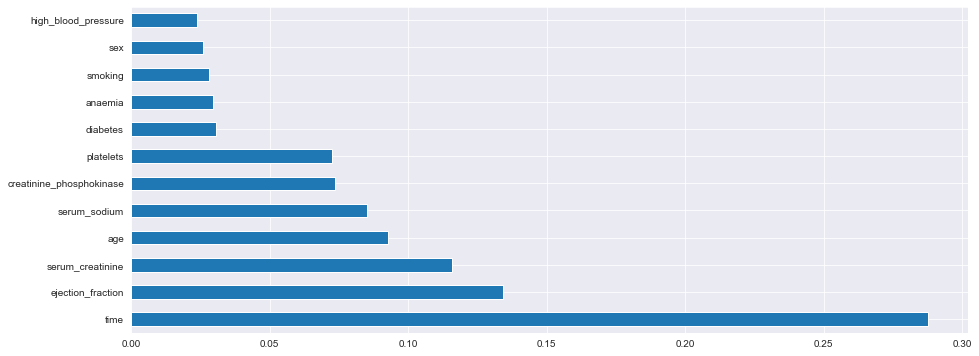

In [6]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [7]:
# We will select only 3 features : time, ejection_fraction, serum_creatinine

-----

Finding outliers

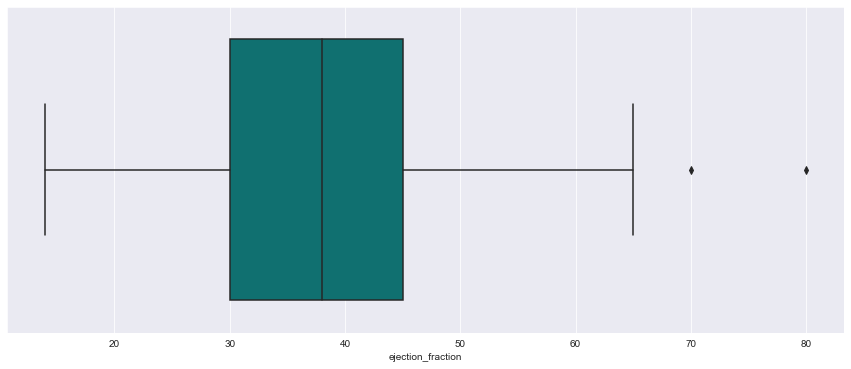

In [8]:
# Boxplot for ejection_fraction

sns.boxplot(x = dataset.ejection_fraction, color = 'teal')
plt.show()

In [9]:
# We can see there are two outliers. Lets remove them

In [10]:
dataset[dataset['ejection_fraction']>=70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [11]:
dataset = dataset[dataset['ejection_fraction']<70]

In [12]:
# Finding outliers in time

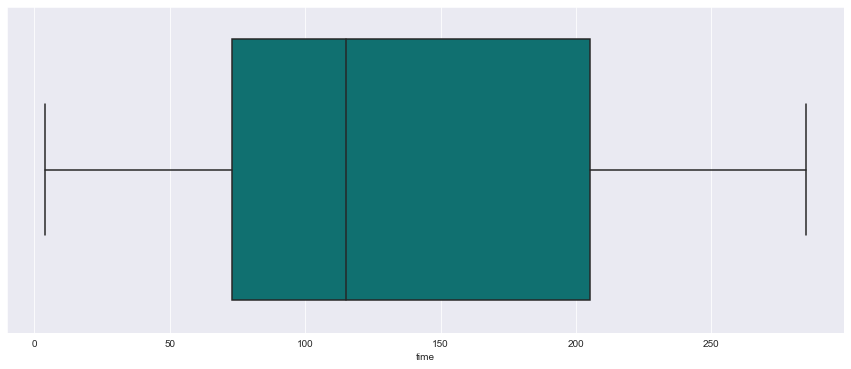

In [13]:
sns.boxplot(x=dataset.time, color = 'teal')
plt.show()

In [14]:
# No outliers in time.

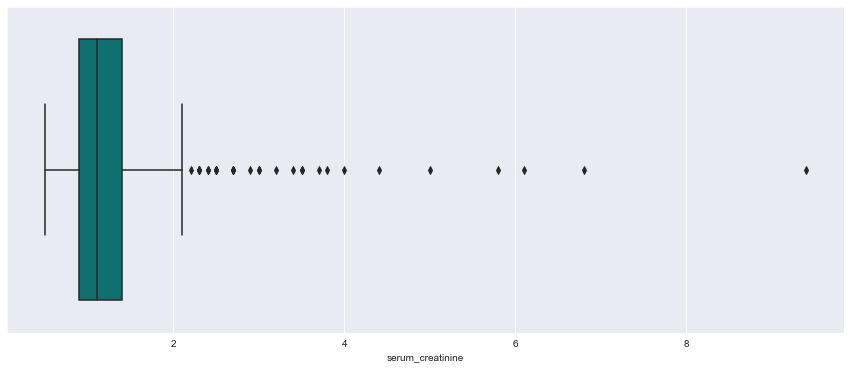

In [15]:
# Boxplot for ejection_fraction
sns.boxplot(x=dataset.serum_creatinine, color = 'teal')
plt.show()

In [16]:
# Before dealing with outliers we require knowledge about the outlier, the dataset and possibly some domain knowledge.
# Removing outliers without a good reason will not always increase accuracy. Without a deep understanding of what are the possible ranges that
# exist within each feature, removing outliers becomes tricky.

# When I researched a bit I found that all the values in serum_creatinine falls in possible range of values. So they are not outliers. 
# They are actual data points that helps in predicting DEATH_EVENT. 

LETS GET SOME INSIGHTS OF THE DATASET

In [17]:
# Distribution of Age

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [18]:
# Hover over the graph to get the count of people of different age groups 

In [19]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="age", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

<div class="alert alert-block alert-info">
Wider sections of the violin plot represent a higher probability of observations taking a given value, the thinner sections correspond 
to a lower probability and the value of probability is given by kde value for given x
</div>

In [20]:
# Similarly lets get insights of other features as well

In [21]:
# Distribution of creatinine_phosphokinase

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['creatinine_phosphokinase'],
    xbins=dict( # bins used for histogram
        start=23,
        end=582,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='CREATININE PHOSPHOKINASE DISTRIBUTION',
    xaxis_title_text='CREATININE PHOSPHOKINASE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [22]:
# Hover over the graph to get the count of people having creatinine phosphokinase levels at same range

In [23]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of CREATININE PHOSPHOKINASE Vs DEATH_EVENT", 
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [24]:
# Distribution of ejection_fraction

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['ejection_fraction'],
    xbins=dict( # bins used for histogram
        start=14,
        end=80,
        size=2
    ),
    marker_color='#A7F432',
    opacity=1
))

fig.update_layout(
    title_text='EJECTION FRACTION DISTRIBUTION',
    xaxis_title_text='EJECTION FRACTION',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [25]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of EJECTION FRACTION Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [26]:
# Distribution of platelets

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['platelets'],
    xbins=dict( # bins used for histogram
        start=25000,
        end=300000,
        size=5000
    ),
    marker_color='#50BFE6',
    opacity=1
))

fig.update_layout(
    title_text='PLATELETS DISTRIBUTION',
    xaxis_title_text='PLATELETS',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [27]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of PLATELETS Vs DEATH_EVENT", 
                   labels={"platelets": "PLATELETS"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [28]:
# Distribution of serum_creatinine

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['serum_creatinine'],
    xbins=dict( # bins used for histogram
        start=0.5,
        end=9.4,
        size=0.2
    ),
    marker_color='#E77200',
    opacity=1
))

fig.update_layout(
    title_text='SERUM CREATININE DISTRIBUTION',
    xaxis_title_text='SERUM CREATININE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [29]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of SERUM CREATININE Vs DEATH_EVENT", 
                   labels={"serum_creatinine": "SERUM CREATININE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [30]:
# Distribution of serum_sodium

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['serum_sodium'],
    xbins=dict( # bins used for histogram
        start=113,
        end=148,
        size=1
    ),
    marker_color='#AAF0D1',
    opacity=1
))

fig.update_layout(
    title_text='SERUM SODIUM DISTRIBUTION',
    xaxis_title_text='SERUM SODIUM',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [31]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of SERUM SODIUM Vs DEATH_EVENT", 
                   labels={"serum_sodium": "SERUM SODIUM"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [32]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["sex"]==1)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["sex"]==1)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["sex"]==0)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> From the above subplot we can conclude that in our dataset 65.3% are MALE (out of which 44.4% survived and 20.9% died) and 34.7% are FEMALE (out of which 23.6% survived and 11.1% died).
</div>

----

In [33]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["diabetes"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["diabetes"]==1)]
d3 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["diabetes"]==0)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["diabetes"]==1)]

label1 = ["No Diabetes","Diabetes"]
label2 = ['No Diabetes - Survived','Diabetes - Survived', "No Diabetes -  Died", "Diabetes  - Died"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="DIABETES"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="DIABETES VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="DIABETES DISTRIBUTION IN THE DATASET \
                  DIABETES VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='DIABETES', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='DIABETES VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b>From the above subplot we can conclude that in our dataset 57.9% are NON DIABETIC (out of which 39.4% survived and 18.5% died) and 42.1% are DIABETIC (out of which 28.6% survived and 13.5% died).
</div>

-----

In [34]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["anaemia"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["anaemia"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["anaemia"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["anaemia"]==1)]

label1 = ["No Anaemia","Anaemia"]
label2 = ['No Anaemia - Survived','No Anaemia - Died', "Anaemia -  Survived", "Anaemia  - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="ANAEMIA"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="ANAEMIA VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="ANAEMIA DISTRIBUTION IN THE DATASET \
                  ANAEMIA VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='ANAEMIA', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='ANAEMIA VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b>From the above subplot we can conclude that in our dataset 56.9% are NON ANAEMIC (out of which 40.1% survived and 16.8% died) and 43.1% are ANAEMIC (out of which 27.9% survived and 15.2% died).
</div>

-----

In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["high_blood_pressure"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["high_blood_pressure"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["high_blood_pressure"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["high_blood_pressure"]==1)]

label1 = ["No High BP","High BP"]
label2 = ['No High BP - Survived','No High BP - Died', "High BP -  Survived", "High BP  - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="HIGH BP"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="HIGH BP VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="HIGH BP DISTRIBUTION IN THE DATASET \
                  HIGH BP VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='HIGH BP', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='HIGH BP VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b>From the above subplot we can conclude that in our dataset 65% do not have HIGH BLOOD PRESSURE (out of which 45.8% survived and 19.2% died) and 35% have HIGH BLOOD PRESSURE (out of which 22.2% survived and 12.8% died).
</div>

-----

In [36]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["smoking"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["smoking"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["smoking"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["smoking"]==1)]

label1 = ["No Smoking","Smoking"]
label2 = ['No Smoking - Survived','No Smoking - Died', "Smoking - Survived", "Smoking - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="SMOKING"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="SMOKING VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="SMOKING DISTRIBUTION IN THE DATASET \
                  SMOKING VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='SMOKING', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='SMOKING VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b>From the above subplot we can conclude that in our dataset 67.7% do not SMOKE (out of which 45.8% survived and 21.9% died) and 32.3% do SMOKE (out of which 22.2% survived and 10.1% died).
</div>

----

In [37]:
# "Distribution of AGE Vs DIABETES"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="diabetes", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of AGE Vs DIABETES", 
                   labels={"diabetes": "DIABETES", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [38]:
# "Distribution of AGE Vs ANAEMIA"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="anaemia", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of AGE Vs ANAEMIA", 
                   labels={"anaemia": "ANAEMIA", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [39]:
# "Distribution of AGE Vs HIGH BLOOD PRESSURE"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="high_blood_pressure", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of AGE Vs HIGH BLOOD PRESSURE", 
                   labels={"high_blood_pressure": "HIGH BLOOD PRESSURE", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [40]:
# "Distribution of AGE Vs SMOKING"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="smoking", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of AGE Vs SMOKING", 
                   labels={"smoking": "SMOKING", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

----

In [41]:
x = dataset.iloc[:, [4,7,11]].values

y = dataset.iloc[:,-1].values

In [42]:
print(x)

[[ 20.     1.9    4.  ]
 [ 38.     1.1    6.  ]
 [ 20.     1.3    7.  ]
 [ 20.     1.9    7.  ]
 [ 20.     2.7    8.  ]
 [ 40.     2.1    8.  ]
 [ 15.     1.2   10.  ]
 [ 60.     1.1   10.  ]
 [ 65.     1.5   10.  ]
 [ 35.     9.4   10.  ]
 [ 38.     4.    10.  ]
 [ 25.     0.9   10.  ]
 [ 30.     1.1   11.  ]
 [ 38.     1.1   11.  ]
 [ 30.     1.    12.  ]
 [ 50.     1.3   13.  ]
 [ 38.     0.9   14.  ]
 [ 14.     0.8   14.  ]
 [ 25.     1.    15.  ]
 [ 55.     1.9   15.  ]
 [ 25.     1.3   16.  ]
 [ 30.     1.6   20.  ]
 [ 35.     0.9   20.  ]
 [ 60.     0.8   22.  ]
 [ 30.     1.83  23.  ]
 [ 38.     1.9   23.  ]
 [ 40.     1.    24.  ]
 [ 45.     1.3   26.  ]
 [ 38.     5.8   26.  ]
 [ 30.     1.2   26.  ]
 [ 38.     1.83  27.  ]
 [ 45.     3.    28.  ]
 [ 35.     1.    28.  ]
 [ 30.     1.2   29.  ]
 [ 50.     1.    29.  ]
 [ 35.     3.5   30.  ]
 [ 50.     1.    30.  ]
 [ 50.     1.    30.  ]
 [ 30.     2.3   30.  ]
 [ 38.     3.    30.  ]
 [ 20.     1.83  31.  ]
 [ 30.     1.2  

In [43]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [44]:
# Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

In [45]:
print(x_train)

[[ 40.     0.8  250.  ]
 [ 25.     2.5   77.  ]
 [ 35.     1.3   88.  ]
 [ 60.     1.   113.  ]
 [ 35.     0.7  197.  ]
 [ 25.     1.3   16.  ]
 [ 25.     0.9   38.  ]
 [ 35.     0.8  120.  ]
 [ 60.     1.4  205.  ]
 [ 35.     1.1  208.  ]
 [ 45.     1.3   26.  ]
 [ 20.     1.83 198.  ]
 [ 25.     0.8  230.  ]
 [ 50.     1.    30.  ]
 [ 25.     1.7   82.  ]
 [ 40.     1.2  121.  ]
 [ 45.     1.    80.  ]
 [ 40.     0.9  244.  ]
 [ 50.     1.3  121.  ]
 [ 35.     1.8  186.  ]
 [ 30.     1.3  212.  ]
 [ 50.     1.1  209.  ]
 [ 40.     1.2   74.  ]
 [ 25.     1.   205.  ]
 [ 40.     1.   140.  ]
 [ 35.     1.   206.  ]
 [ 25.     1.2   85.  ]
 [ 60.     1.1   33.  ]
 [ 35.     1.3  212.  ]
 [ 25.     1.2  154.  ]
 [ 35.     0.8  145.  ]
 [ 40.     1.   147.  ]
 [ 38.     2.2   45.  ]
 [ 60.     0.9  107.  ]
 [ 25.     1.    15.  ]
 [ 45.     0.9  174.  ]
 [ 25.     2.4  214.  ]
 [ 60.     3.2   94.  ]
 [ 38.     1.83  95.  ]
 [ 35.     1.    72.  ]
 [ 35.     1.   108.  ]
 [ 35.     1.1  

In [46]:
print(y_test)

[0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


----

In [47]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

----

1. LOGISTIC REGRESSION

In [48]:
# Applying logistic regression on the training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [49]:
# Predicting the test set

y_pred = classifier.predict(x_test)

In [50]:
# Making Confusion Matrix and calculating accuracy score

mylist = []
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[40  3]
 [ 4 13]]
0.8833333333333333


----

2. K NEAREST NEIGHBOR

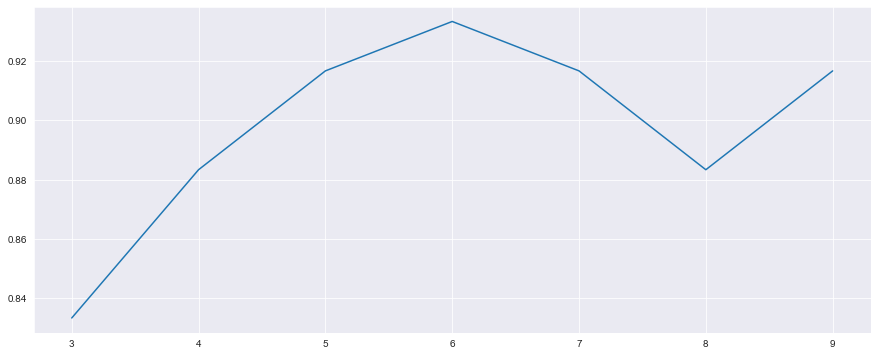

In [51]:
# Finding the optimum number of neighbors 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,10)), list1)
plt.show()

In [52]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [53]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [54]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[42  1]
 [ 3 14]]
0.9333333333333333


----

3. SUPPORT VECTOR CLASSIFIER

In [1]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

NameError: name 'x_train' is not defined

In [134]:
# Training the Support Vector Classifier on the Training set

from sklearn.svm import SVC
classifier = SVC(C = 0.6, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC(C=0.6, random_state=0)

In [135]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0]


In [136]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

[[40  3]
 [ 3 14]]
0.9


-----

4. DECISION TREE CLASSIFIER

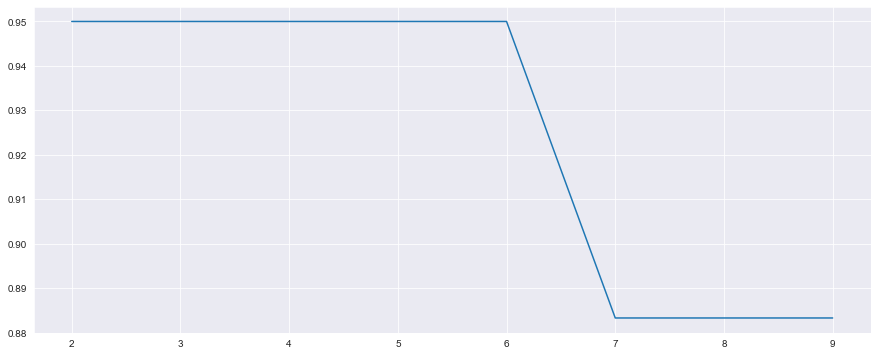

In [137]:
# Finding the optimum number of max_leaf_nodes

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,10)), list1)
plt.show()

In [138]:
# Training the Decision Tree Classifier on the Training set

classifier = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=0)

In [139]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [140]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

[[43  0]
 [ 3 14]]
0.95


-----

5. RANDOM FOREST CLASSIFCATION

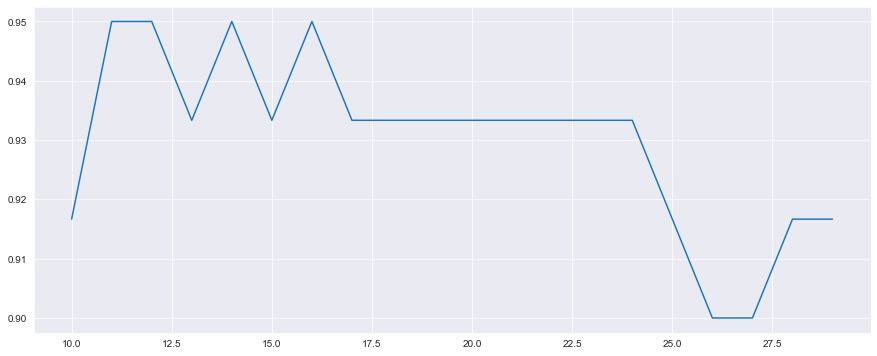

In [141]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [142]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 11, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=0)

In [143]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [144]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[41  2]
 [ 1 16]]
0.95


----

6. ANN

In [145]:
np.random.seed(0)
import tensorflow as tf

# Initialising the ANN

ann = tf.keras.models.Sequential()

In [146]:
# Adding the input layer and the first hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [147]:
# Adding the second hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [148]:
# Adding the third hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [149]:
# Adding the fourth hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [150]:
# Adding the output layer

ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [151]:
# Compiling the ANN

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

In [152]:
# Training the ANN on the training set

ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 0.7027 - accuracy: 0.3460
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4557
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.6203
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.7553
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.7764
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.7764
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.7806
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.7890
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.7932
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.7975
Epoch 11/100
8/8 [===========

In [153]:
# Predicting the test set results

y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()
print(np.concatenate( (y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]]


In [154]:
# Making the confusion matrix, calculating accuracy_score 

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac)
mylist.append(ac)

Confusion Matrix
[[39  4]
 [ 4 13]]

Accuracy
0.8666666666666667


-----

----

---

In [155]:
# Plotting accuracy score of different models
mylist

[0.8833333333333333, 0.9333333333333333, 0.9, 0.95, 0.95, 0.8666666666666667]

In [156]:
mylist2 = ["Logistic Regression", "KNearestNeighbours","SupportVector","DecisionTree","RandomForest","ANN"]

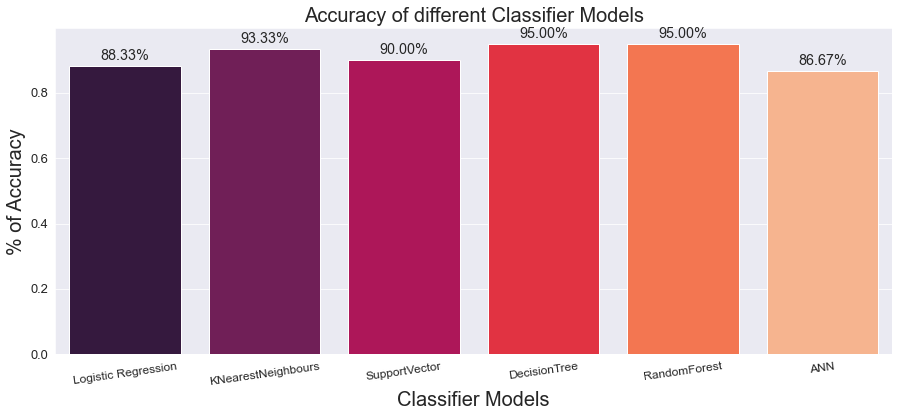

In [157]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()